In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

fuel_zipcode = pd.read_csv('data/DMV/DMV_2023.csv')
territory_df = pd.read_excel('data/SDGE_territory.xlsx')

fuel_zipcode = fuel_zipcode[fuel_zipcode['ZIP Code'] != 'OOS']
fuel_zipcode['ZIP Code'] = fuel_zipcode['ZIP Code'].astype(int)
fuel_zipcode['ZIP Code'] = fuel_zipcode['ZIP Code'].astype(int)
merged_df = fuel_zipcode.merge(territory_df, left_on = 'ZIP Code', right_on= "ZIP_CODE")


##### **Pie Chart Fuel type distribution**

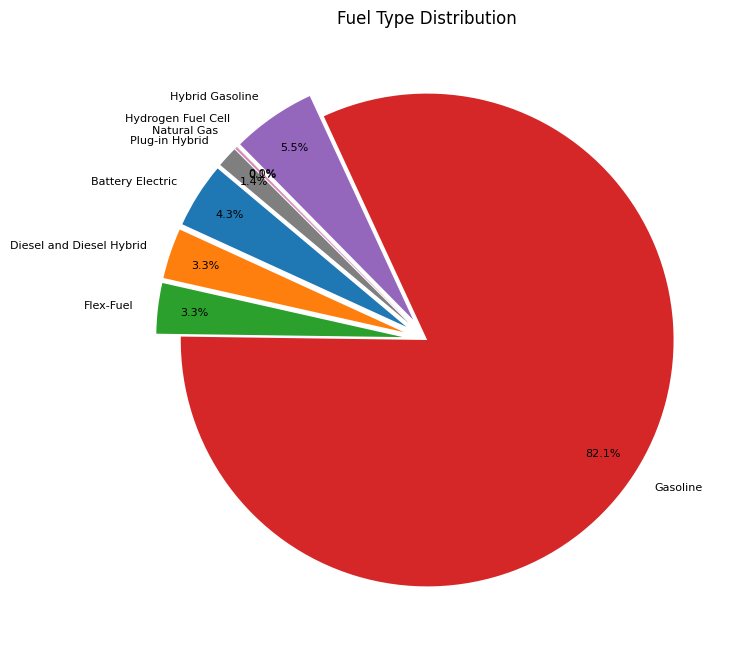

In [3]:
count = merged_df.groupby('Fuel')['Vehicles'].sum()
count = count.drop(['Other','Unk'])
index = list(count.index)

explode = [0.1 if c < 500000 else 0 for c in count]
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    count, labels=index, autopct='%1.1f%%', startangle=140, explode=explode,
    pctdistance=0.85, labeldistance=1.1, textprops={'fontsize': 8}
)
plt.title('Fuel Type Distribution')

specific_label_index = index.index("Hydrogen Fuel Cell")
texts[specific_label_index].set_position((-0.8, 0.9))

plt.title('Fuel Type Distribution')
plt.show()

##### **Pie Chart Vehicle type distribution**

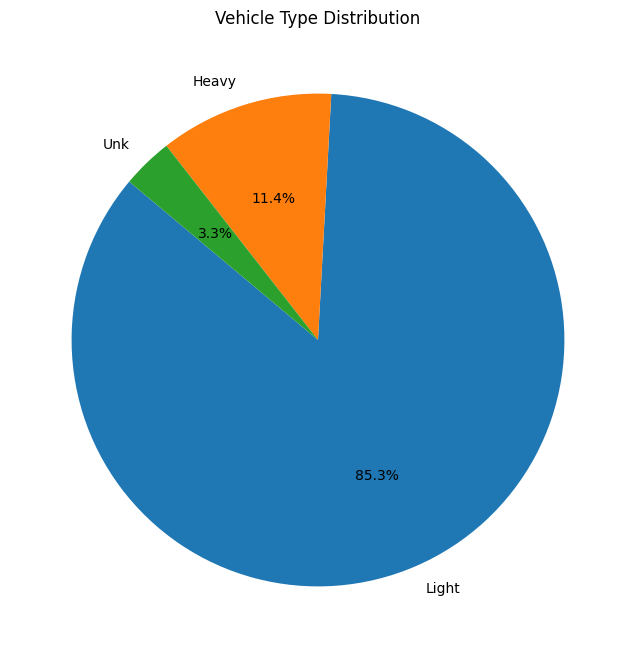

In [4]:
count2 = merged_df['Duty'].value_counts()
index2 = count2.index
plt.figure(figsize=(10, 8))
plt.pie(count2, labels=index2, autopct='%1.1f%%', startangle=140)
plt.title('Vehicle Type Distribution')
plt.show()

##### **Comparison of EV Station and Electric Car Counts Over Time**

In [3]:
df_unfiltered = pd.read_csv('data/stations_data.csv')
columns_to_keep = ['access_code', 'access_days_time', 'cards_accepted', 'expected_date', 'fuel_type_code', 'id','maximum_vehicle_class', 'open_date', 'owner_type_code',
'restricted_access', 'status_code', 'funding_sources', 'facility_type','station_name',
'latitude', 'longitude', 'city', 'country', 'intersection_directions','state', 'street_address', 'zip']
df = df_unfiltered[columns_to_keep]
sdge_df = df.merge(territory_df, left_on = 'zip', right_on = 'ZIP_CODE')
sdge_df['open_date'] = pd.to_datetime(sdge_df['open_date'])
sdge_df['year'] = sdge_df['open_date'].dt.year

sdge_df = sdge_df[(sdge_df['fuel_type_code'] == 'ELEC') & (sdge_df['year'] >= 2010)]


years_station = list(sdge_df.groupby('year').count()['access_code'].index)
count_station = sdge_df.groupby('year').count()['access_code']

car_year_count = fuel_zipcode[fuel_zipcode['Fuel'] == 'Battery Electric']['Model Year'].value_counts().drop(['2010','<2010']).sort_index()
car_year_year = [int(i) for i in car_year_count.index]

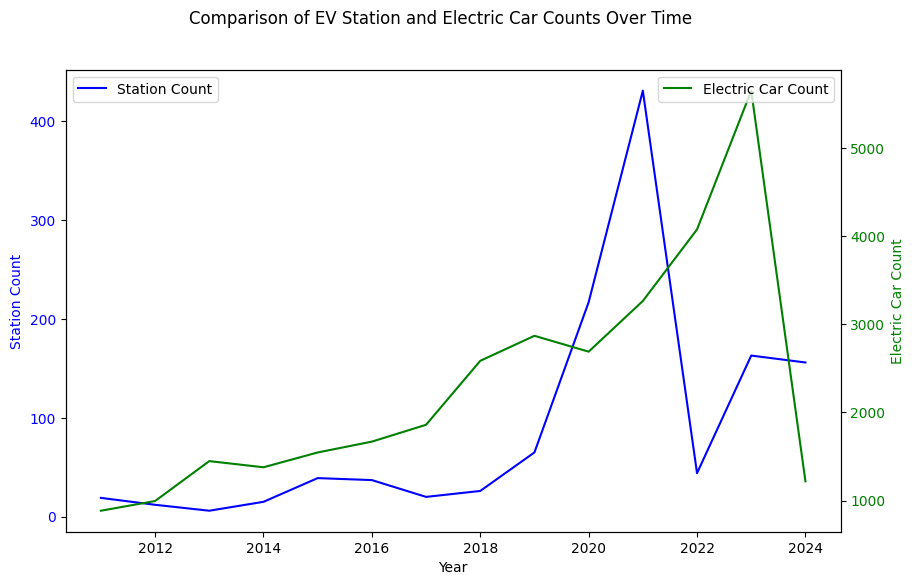

In [4]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(years_station, count_station, color='b', label='Station Count')
ax1.set_xlabel('Year')
ax1.set_ylabel('Station Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(car_year_year, car_year_count, color='g', label='Electric Car Count')
ax2.set_ylabel('Electric Car Count', color='g')
ax2.tick_params(axis='y', labelcolor='g')

fig.suptitle('Comparison of EV Station and Electric Car Counts Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

##### **Duty Type Distribution by Fuel Type**

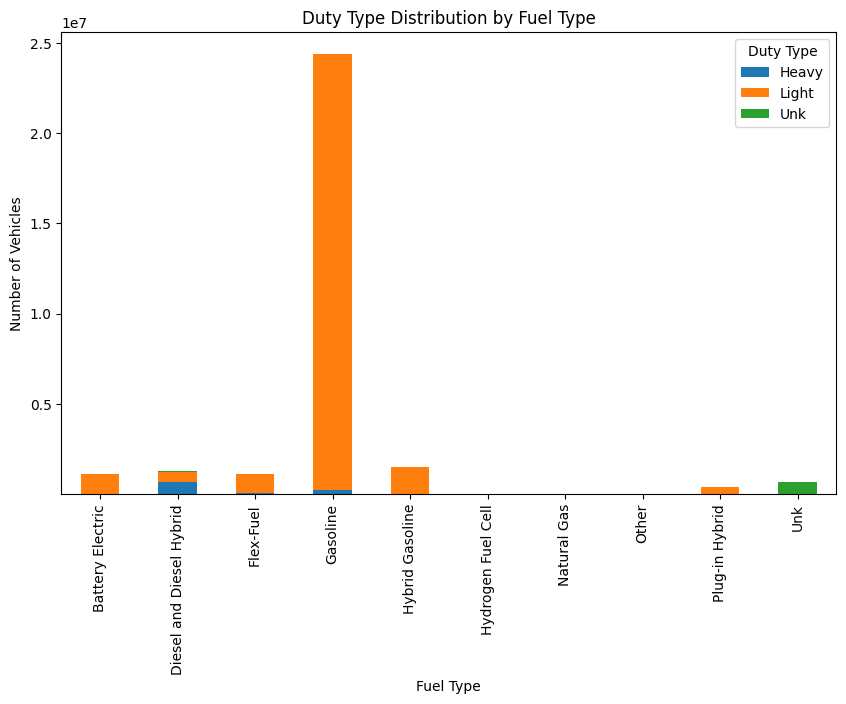

In [8]:
duty_fuel_counts = fuel_zipcode.groupby(['Fuel', 'Duty'])['Vehicles'].sum().unstack(fill_value=0)
duty_fuel_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Duty Type Distribution by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Number of Vehicles")
plt.legend(title="Duty Type")
plt.show()

##### **Distribution of Vehicle Counts by Model Year**

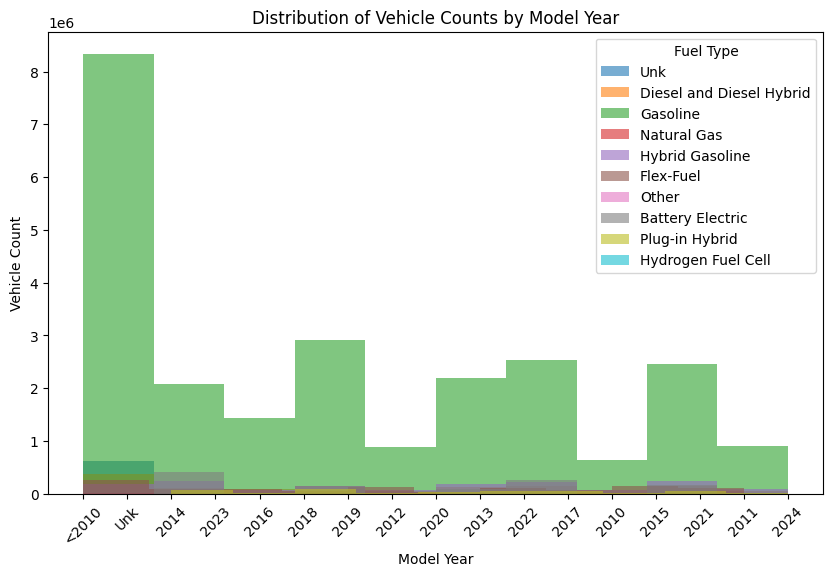

In [5]:
plt.figure(figsize=(10, 6))

fuel_types = fuel_zipcode['Fuel'].unique()
for fuel in fuel_types:
    subset = fuel_zipcode[fuel_zipcode['Fuel'] == fuel]
    plt.hist(subset['Model Year'], bins=10, weights=subset['Vehicles'], alpha=0.6, label=fuel)

plt.title("Distribution of Vehicle Counts by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Vehicle Count")
plt.legend(title="Fuel Type")
plt.xticks(rotation=45)
plt.show()